In [1]:
#Return Series= Array of Percentage Changes in Stock Price
#used to normalise stock returns

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,10) #to set the graph range

In [3]:
stock = ("HDFCBANK.ns") #Stock Name and followed by Exchange

In [4]:
df=yf.download(tickers=stock,period="5y")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-14,1070.000000,1070.000000,1052.800049,1055.099976,1018.096985,3720694
2019-02-15,1053.675049,1054.050049,1039.099976,1050.324951,1013.489197,4208262
2019-02-18,1053.400024,1059.000000,1043.000000,1044.949951,1008.302734,3569372
2019-02-19,1044.849976,1054.074951,1039.099976,1042.025024,1005.480530,2634318
2019-02-20,1044.250000,1055.500000,1040.949951,1054.175049,1017.204346,2446250
...,...,...,...,...,...,...
2024-02-08,1429.849976,1438.949951,1400.500000,1403.050049,1403.050049,34553062
2024-02-09,1392.150024,1414.199951,1387.000000,1403.599976,1403.599976,28321062
2024-02-12,1399.650024,1413.650024,1383.349976,1390.000000,1390.000000,17223906


In [6]:
import matplotlib.pyplot as plt


<Axes: xlabel='Date'>

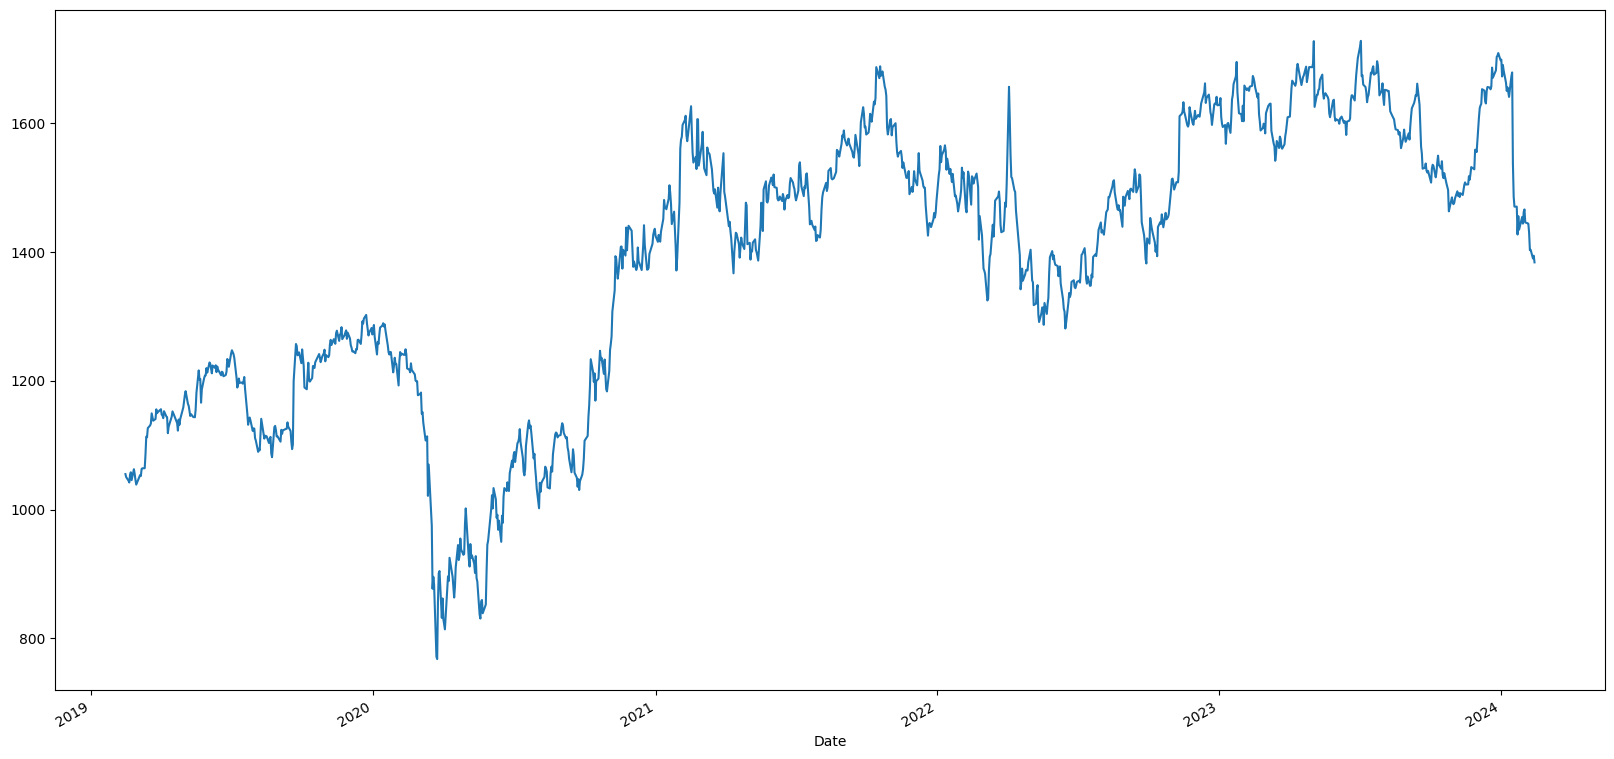

In [7]:
df["Close"].plot()

<Axes: xlabel='Date'>

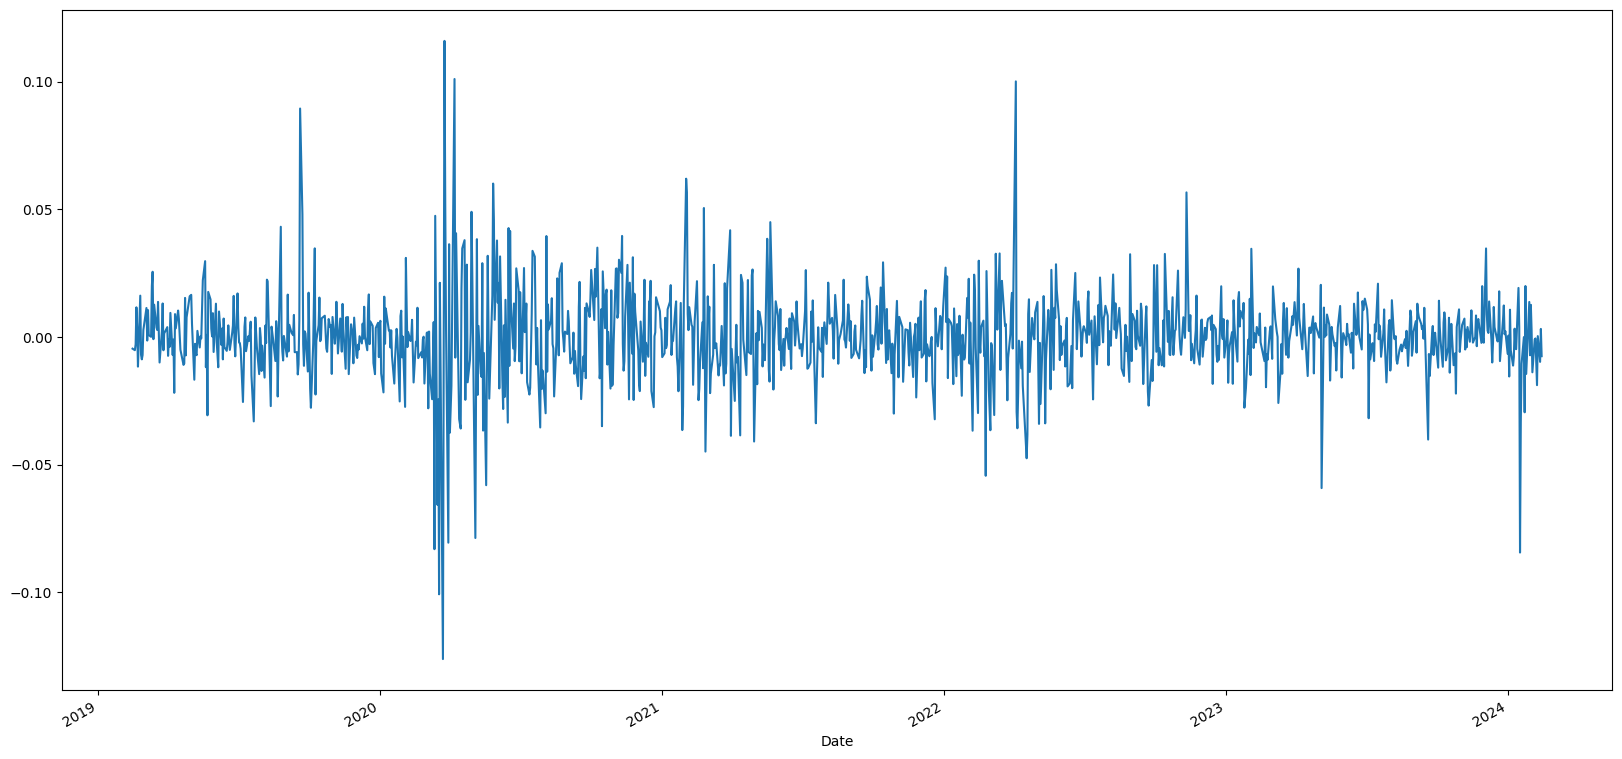

In [8]:
df["Close"].pct_change().plot()

In [41]:
stocks=['RELIANCE.ns','TCS.ns','AXISBANK.NS','HDFCBANK.ns','BAJFINANCE.NS','INFY.NS','KOTAKBANK.NS','TATASTEEL.NS','SUZLON.NS','TATAPOWER.NS']

In [62]:
Stocks=yf.download(tickers=stocks,period='5y')

[*********************100%%**********************]  10 of 10 completed


<Axes: xlabel='Date'>

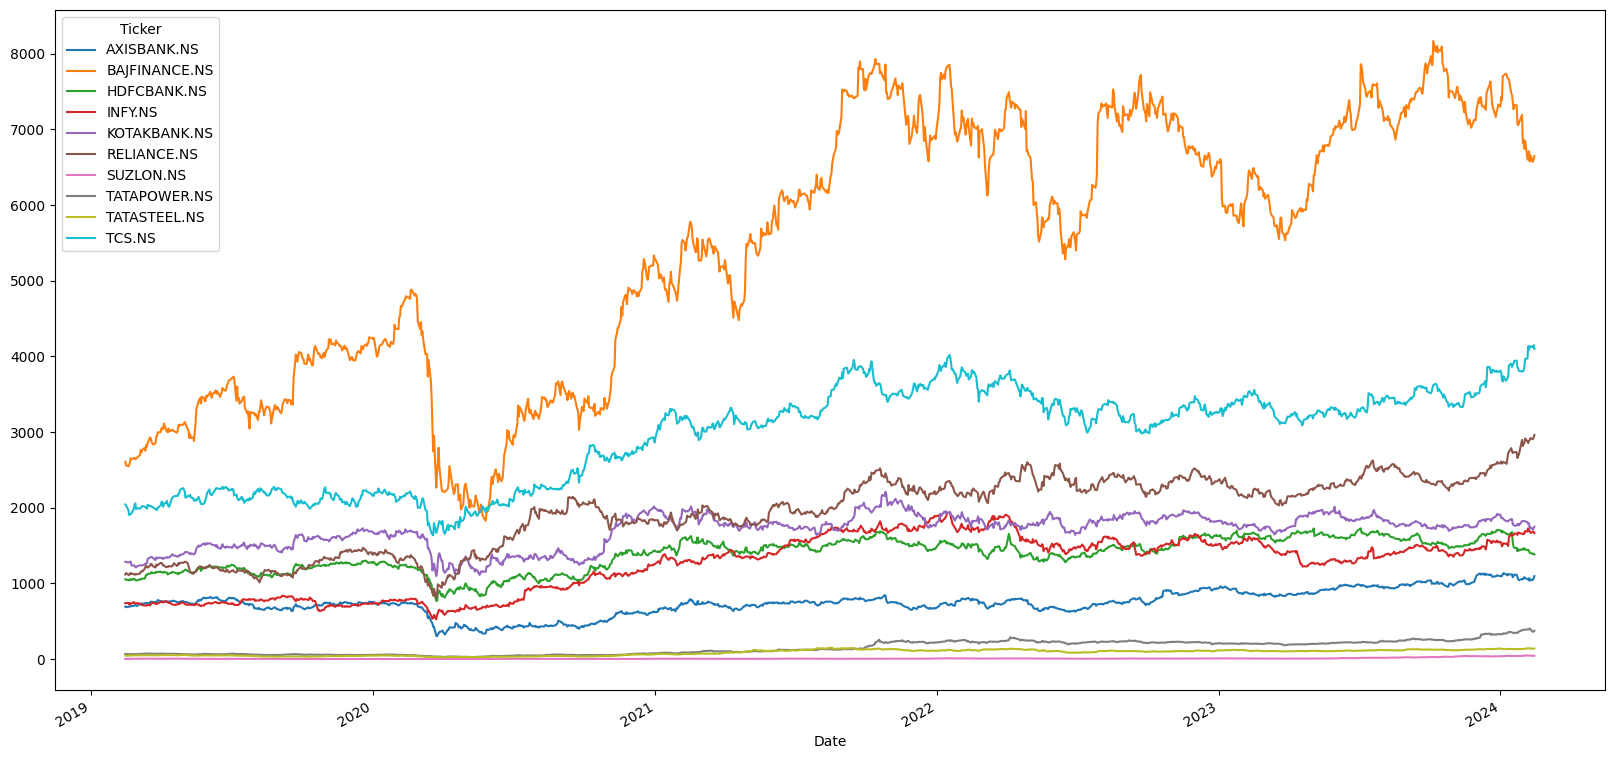

In [63]:
Stocks['Close'].plot()

In [64]:
#To get cumuative returns, take product of (1+%change) using np.cumprod()

In [65]:
np.cumprod(1+Stocks['Close'].pct_change())
           

Ticker,AXISBANK.NS,BAJFINANCE.NS,HDFCBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SUZLON.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,,,
2019-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-15,0.987914,0.981565,0.995474,1.002567,0.997552,1.016541,0.985715,1.024426,0.968812,0.992712
2019-02-18,0.997554,0.977100,0.990380,1.001351,0.992423,0.996651,0.985715,0.967431,0.964770,0.963660
2019-02-19,0.997194,0.981067,0.987608,0.978718,0.995065,0.993384,1.014286,0.975574,0.975961,0.931625
2019-02-20,1.007698,0.998831,0.999123,1.000878,1.002292,1.008291,1.057143,0.990377,1.017822,0.936491
...,...,...,...,...,...,...,...,...,...,...
2024-02-08,1.490504,2.520179,1.329779,2.286467,1.344187,2.591068,15.355902,6.031088,2.976893,2.021960
2024-02-09,1.512806,2.550399,1.330300,2.255726,1.354095,2.610053,14.733575,5.804589,2.928194,2.021765
2024-02-12,1.506043,2.517687,1.317411,2.270252,1.328528,2.595044,14.002343,5.354552,2.847373,2.015407


In [66]:
((np.cumprod(1+Stocks['Close'].pct_change())-1).iloc[-1]).sort_values()

Ticker
HDFCBANK.NS       0.311771
KOTAKBANK.NS      0.359147
AXISBANK.NS       0.578201
TCS.NS            1.005331
INFY.NS           1.251469
BAJFINANCE.NS     1.547333
RELIANCE.NS       1.646905
TATASTEEL.NS      1.926122
TATAPOWER.NS      4.532198
SUZLON.NS        13.329064
Name: 2024-02-14 00:00:00, dtype: float64

<Axes: xlabel='Ticker'>

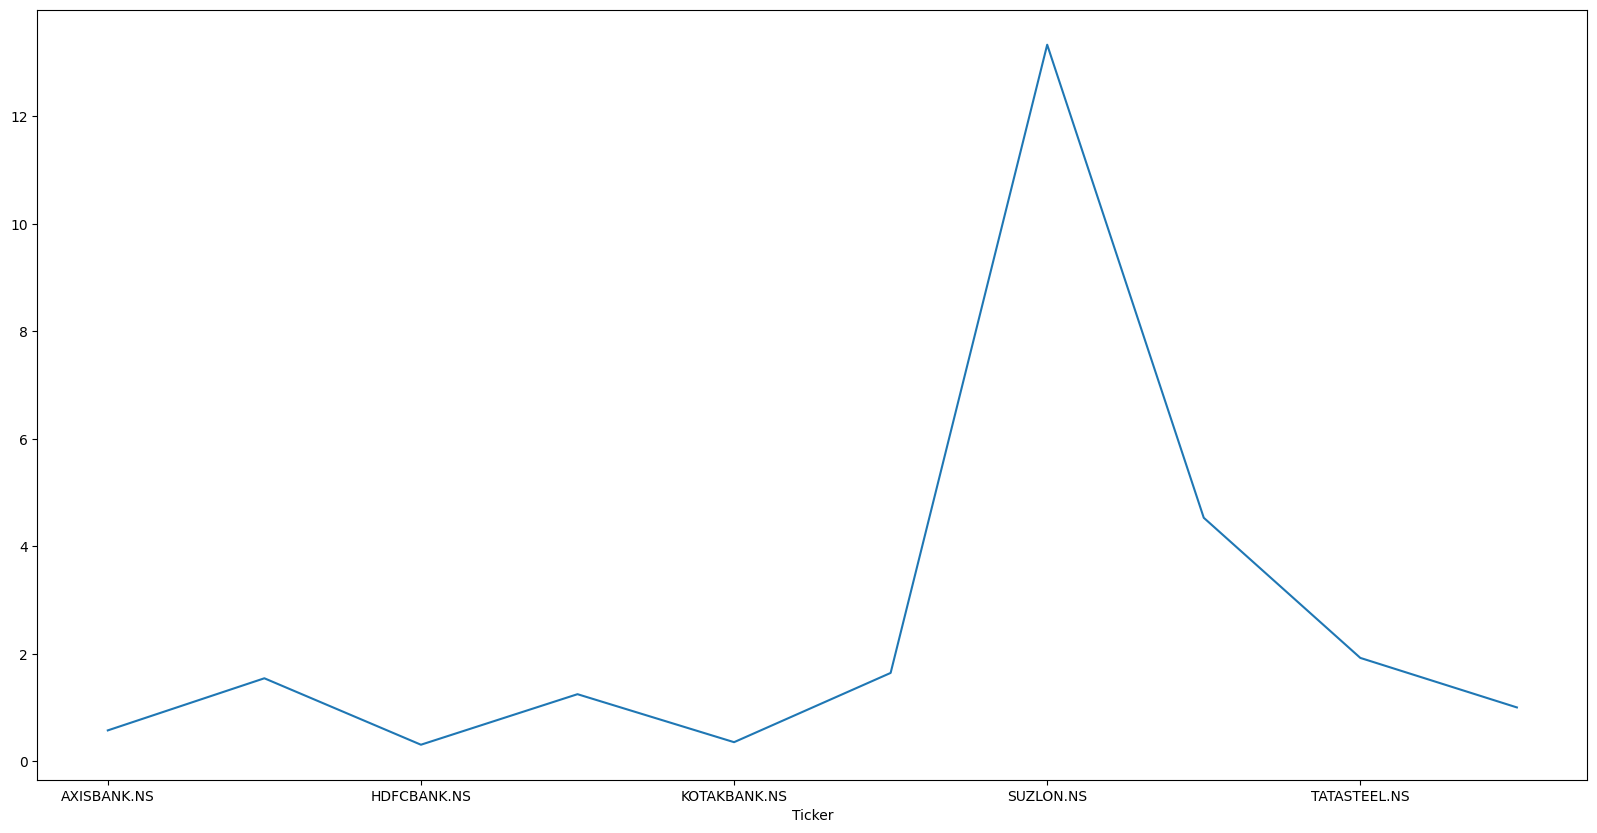

In [67]:
((np.cumprod(1+Stocks['Close'].pct_change())-1).iloc[-1]).plot()

<Axes: xlabel='Date'>

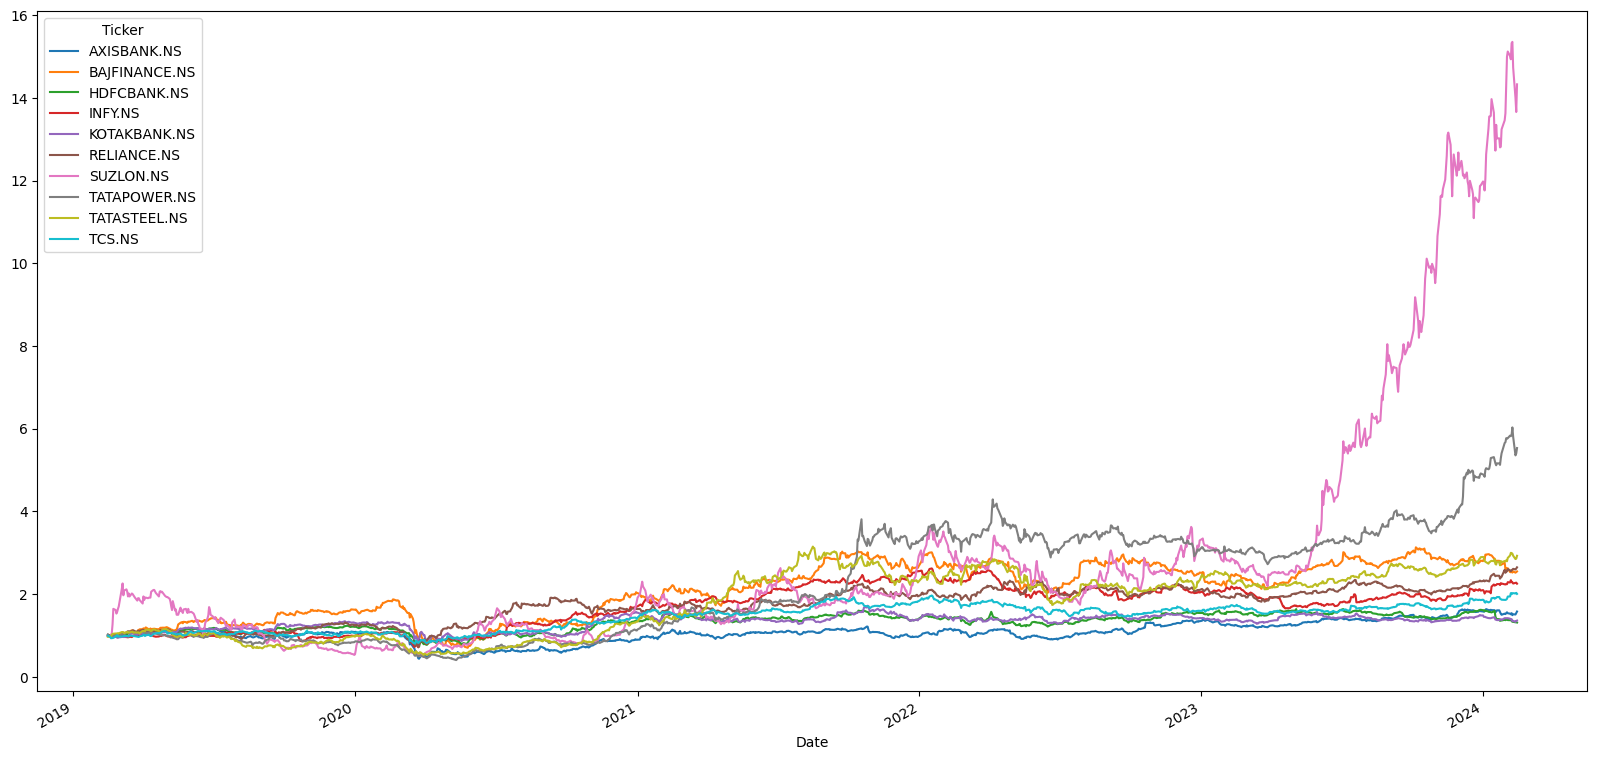

In [68]:
np.cumprod(1+Stocks['Close'].pct_change()).plot()

In [69]:
daily_returns=Stocks['Close'].pct_change()

#Resampling data to get annual returns
annual_returns=daily_returns.resample('Y').apply( lambda x:(x+1).prod()-1)

#Print Annual Returns
print("Annual Returns:")
annual_returns

Annual Returns:


Ticker,AXISBANK.NS,BAJFINANCE.NS,HDFCBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SUZLON.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,,,
2019-12-31,0.085036,0.623007,0.205668,-0.012026,0.308945,0.236767,-0.471429,-0.163583,-0.021759,0.057273
2020-12-31,-0.177231,0.250416,0.129078,0.717568,0.184789,0.323681,2.459461,0.338938,0.363521,0.324305
2021-12-31,0.093642,0.317665,0.030008,0.503225,-0.099970,0.192842,0.593750,1.920687,0.726793,0.305860
2022-12-31,0.376096,-0.057630,0.100548,-0.201059,0.017343,0.075607,0.131780,-0.059968,0.013541,-0.128840
2023-12-31,0.180509,0.114453,0.049811,0.023008,0.044247,0.099481,2.603774,0.599182,0.239237,0.164799
2024-12-31,-0.004944,-0.092969,-0.190259,0.079914,-0.083408,0.146154,0.205497,0.125094,0.011461,0.080851


In [70]:
Stocks['Adj Close']

Ticker,AXISBANK.NS,BAJFINANCE.NS,HDFCBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SUZLON.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,,,
2019-02-14,692.376404,2563.227051,1018.096985,649.004517,1283.638062,1096.822266,3.213748,62.322617,41.194363,1829.888428
2019-02-15,684.008057,2515.974854,1013.489197,650.670715,1280.495850,1114.965332,3.167838,63.844910,39.909573,1816.553345
2019-02-18,690.682800,2504.530029,1008.302734,649.881409,1273.912109,1093.149048,3.167838,60.292858,39.743107,1763.391235
2019-02-19,690.433777,2514.697754,1005.480469,635.192078,1277.303589,1089.565308,3.259659,60.800301,40.204090,1704.769775
2019-02-20,697.706238,2560.230957,1017.204346,649.574646,1286.580811,1105.916260,3.397391,61.722912,41.928532,1713.674805
...,...,...,...,...,...,...,...,...,...,...
2024-02-08,1035.900024,6575.649902,1403.050049,1692.099976,1729.699951,2900.250000,49.349998,407.399994,143.649994,4134.100098
2024-02-09,1051.400024,6654.500000,1403.599976,1669.349976,1742.449951,2921.500000,47.349998,392.100006,141.300003,4133.700195
2024-02-12,1046.699951,6569.149902,1390.000000,1680.099976,1709.550049,2904.699951,45.000000,361.700012,137.399994,4120.700195


In [71]:
#Sharpe Ratio tells about the risk adjusted return and the volatility in the stock
#Sharpe Ratio = (Returns-Risk Free returns)/Std Deviation
#risk adjusted return will be higher for lesser volatile graphs

In [72]:
#Bias is when the entire data set is shifted towards a particular side
#Variance

In [102]:
mean_percentage_change=Stocks.pct_change().mean()
standard_deviation=Stocks.pct_change().std()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [103]:
Sharpe=mean_percentage_change/standard_deviation

In [104]:
Sharpe.sort_values(ascending=False)

Ticker
SRF.NS           0.081101
BAJFINANCE.NS    0.076429
TRENT.NS         0.074373
TVSMOTOR.NS      0.072787
ADANIENT.NS      0.068576
                   ...   
BANKBARODA.NS    0.023880
COALINDIA.NS     0.019344
VEDL.NS          0.018796
ONGC.NS          0.017058
PNB.NS           0.012930
Length: 84, dtype: float64

In [105]:
file_path=r"/Users/sahil/Downloads/nifty.csv"
Stocks=pd.read_csv(file_path)
Stocks

,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
1,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010
2,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
3,Adani Green Energy Ltd.,Power,ADANIGREEN,EQ,INE364U01010
4,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
...,...,...,...,...,...
96,Varun Beverages Ltd.,Fast Moving Consumer Goods,VBL,EQ,INE200M01021
97,Vedanta Ltd.,Metals & Mining,VEDL,EQ,INE205A01025
98,Wipro Ltd.,Information Technology,WIPRO,EQ,INE075A01022
99,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015


In [106]:
stocks=(Stocks['Symbol']+str('.ns')).to_list() #converting to list since "tickers" accepts only lists as parameters

In [107]:
ClosingPrice=yf.download(tickers=stocks,start="2014-1-1")["Close"]

[*********************100%%**********************]  101 of 101 completed


In [108]:
ClosingPrice

Ticker,ABB.NS,ADANIENSOL.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,AWL.NS,...,TORNTPHARM.NS,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,622.881836,NaN,41.192673,NaN,156.300003,183.649994,969.299988,499.750000,NaN,NaN,...,234.975006,122.870003,73.349998,1769.250000,132.300003,NaN,202.000000,207.262558,NaN,159.750000
2014-01-02,610.534973,NaN,39.138786,NaN,152.649994,179.149994,930.549988,485.549988,NaN,NaN,...,234.975006,120.565002,78.099998,1731.099976,131.300003,NaN,199.850006,207.356308,NaN,157.330002
2014-01-03,604.997009,NaN,38.065861,NaN,149.899994,177.800003,951.950012,489.500000,NaN,NaN,...,234.649994,119.785004,78.949997,1727.199951,133.399994,NaN,199.149994,208.725052,NaN,156.149994
2014-01-06,607.584412,NaN,38.632977,NaN,150.850006,176.300003,945.700012,490.649994,NaN,NaN,...,234.524994,117.425003,76.650002,1724.300049,134.300003,NaN,198.949997,209.250046,NaN,157.529999
2014-01-07,600.820862,NaN,37.084900,NaN,145.949997,175.250000,932.099976,489.950012,NaN,NaN,...,235.800003,119.559998,74.900002,1690.199951,134.500000,NaN,194.500000,206.325058,NaN,160.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08,4450.399902,1049.900024,3168.600098,1827.949951,1245.199951,563.349976,6231.000000,2929.600098,1023.099976,348.649994,...,2645.899902,3841.949951,2033.750000,9997.650391,464.850006,1375.349976,278.600006,488.850006,144.100006,802.049988
2024-02-09,4489.450195,1054.699951,3215.199951,1880.699951,1271.500000,576.200012,6437.350098,2951.649902,1023.750000,344.950012,...,2657.350098,3759.550049,2037.599976,9945.750000,457.950012,1370.000000,274.350006,490.450012,149.449997,805.049988
2024-02-12,4428.399902,1069.449951,3169.750000,1842.599976,1249.349976,563.500000,6614.450195,2953.800049,1025.250000,338.399994,...,2619.649902,3802.050049,2035.750000,9963.849609,458.399994,1389.349976,268.149994,501.450012,153.800003,856.650024


In [109]:
ClosingPrice.dropna(axis=1,inplace=True) #use how= to remove if entire value has NA

In [110]:
ClosingPrice

Ticker,ABB.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,...,TECHM.NS,TITAN.NS,TORNTPHARM.NS,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,622.881836,41.192673,156.300003,183.649994,969.299988,499.750000,258.440002,1917.400024,76.010002,896.549988,...,457.024994,230.800003,234.975006,122.870003,73.349998,1769.250000,132.300003,202.000000,207.262558,159.750000
2014-01-02,610.534973,39.138786,152.649994,179.149994,930.549988,485.549988,254.460007,1900.050049,72.834999,881.000000,...,454.024994,226.350006,234.975006,120.565002,78.099998,1731.099976,131.300003,199.850006,207.356308,157.330002
2014-01-03,604.997009,38.065861,149.899994,177.800003,951.950012,489.500000,252.179993,1895.550049,72.930000,876.000000,...,458.875000,227.399994,234.649994,119.785004,78.949997,1727.199951,133.399994,199.149994,208.725052,156.149994
2014-01-06,607.584412,38.632977,150.850006,176.300003,945.700012,490.649994,251.259995,1888.300049,73.169998,900.750000,...,453.962494,227.800003,234.524994,117.425003,76.650002,1724.300049,134.300003,198.949997,209.250046,157.529999
2014-01-07,600.820862,37.084900,145.949997,175.250000,932.099976,489.950012,246.850006,1889.949951,73.105003,889.549988,...,451.012512,226.050003,235.800003,119.559998,74.900002,1690.199951,134.500000,194.500000,206.325058,160.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08,4450.399902,3168.600098,1245.199951,563.349976,6231.000000,2929.600098,1035.900024,7757.250000,1570.550049,8674.049805,...,1309.250000,3549.100098,2645.899902,3841.949951,2033.750000,9997.650391,464.850006,278.600006,488.850006,802.049988
2024-02-09,4489.450195,3215.199951,1271.500000,576.200012,6437.350098,2951.649902,1051.400024,7784.850098,1570.949951,8634.049805,...,1311.050049,3591.600098,2657.350098,3759.550049,2037.599976,9945.750000,457.950012,274.350006,490.450012,805.049988
2024-02-12,4428.399902,3169.750000,1249.349976,563.500000,6614.450195,2953.800049,1046.699951,7829.950195,1557.250000,8619.599609,...,1318.800049,3585.250000,2619.649902,3802.050049,2035.750000,9963.849609,458.399994,268.149994,501.450012,856.650024


In [111]:
mean_percentage_change=ClosingPrice.pct_change().mean()
standard_deviation=ClosingPrice.pct_change().std()
Sharpe=mean_percentage_change/standard_deviation
Sharpe.sort_values(ascending=False)

Ticker
SRF.NS           0.081101
BAJFINANCE.NS    0.076429
TRENT.NS         0.074373
TVSMOTOR.NS      0.072787
ADANIENT.NS      0.068576
                   ...   
BANKBARODA.NS    0.023880
COALINDIA.NS     0.019344
VEDL.NS          0.018796
ONGC.NS          0.017058
PNB.NS           0.012930
Length: 84, dtype: float64

In [113]:
cumprod_series=np.cumprod(1+ClosingPrice.pct_change())

<Axes: xlabel='Date'>

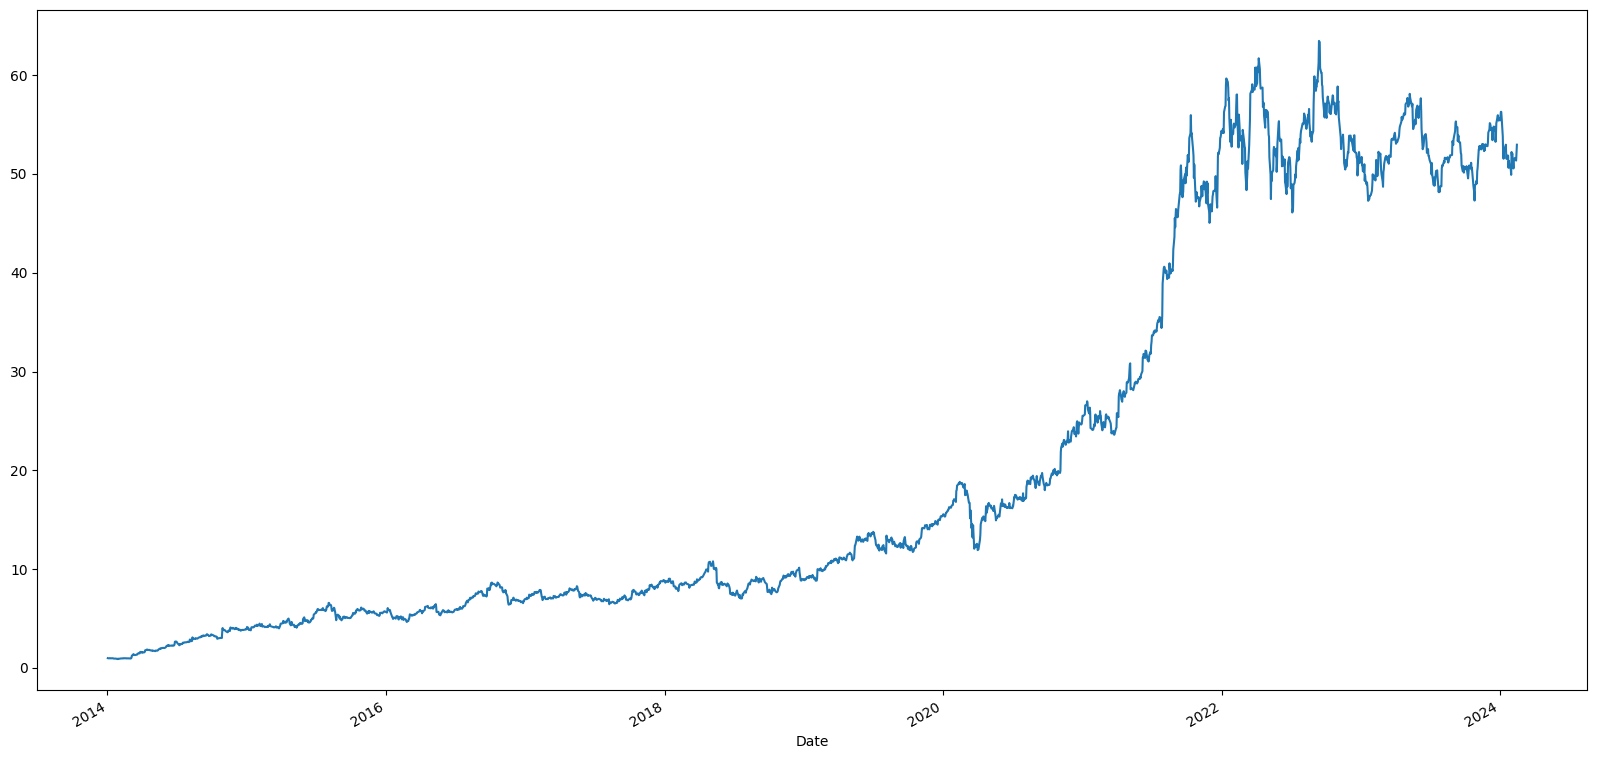

In [117]:
cumprod_series['SRF.NS'].plot()


In [118]:
standard_deviation.sort_values(ascending=False)

Ticker
ADANIENT.NS      0.034071
JINDALSTEL.NS    0.032724
DLF.NS           0.029041
VEDL.NS          0.028035
CANBK.NS         0.027583
                   ...   
NESTLEIND.NS     0.014727
HINDUNILVR.NS    0.014295
HDFCBANK.NS      0.014244
PGHH.NS          0.013658
COLPAL.NS        0.013648
Length: 84, dtype: float64

<Axes: xlabel='Date'>

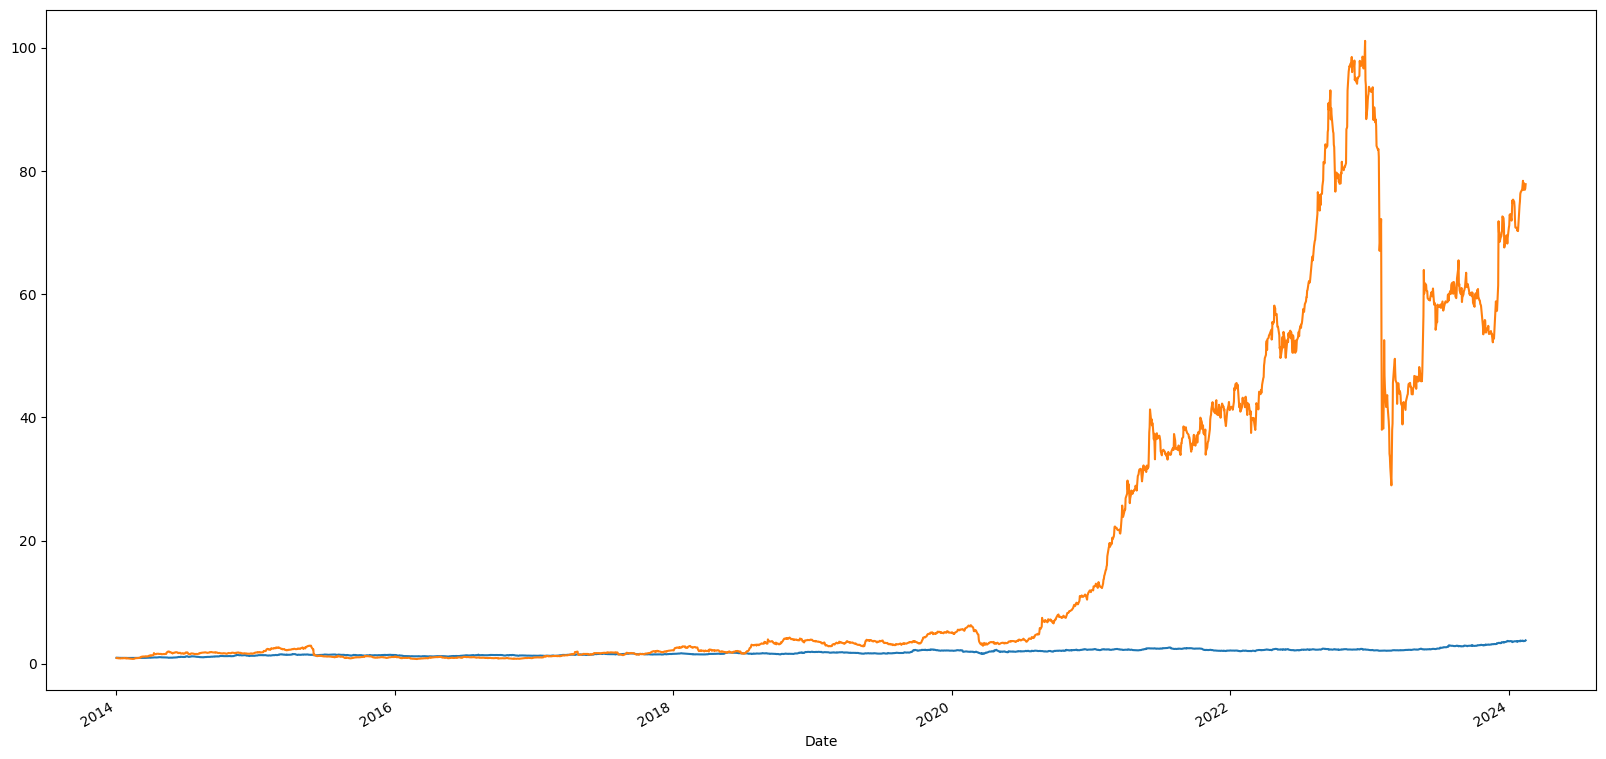

In [119]:
cumprod_series['COLPAL.NS'].plot()
cumprod_series['ADANIENT.NS'].plot()

In [120]:
#Low volatitlity does not mean safe risk free returns always

In [123]:
Sharpe['ADANIENT.NS'],Sharpe['COLPAL.NS'] #Despite low volatility, low returns => Low Sharpe
#Sharpe ratio used to analyse stocks and reporting stocks but not inversting persay

(0.06857614782785633, 0.0460918959741951)

In [124]:
mean_percentage_change.sort_values(ascending=False)

Ticker
ADANIENT.NS      0.002336
SRF.NS           0.001849
BAJFINANCE.NS    0.001771
TRENT.NS         0.001624
CHOLAFIN.NS      0.001589
                   ...   
HEROMOTOCO.NS    0.000489
ITC.NS           0.000389
COALINDIA.NS     0.000373
ONGC.NS          0.000367
PNB.NS           0.000355
Length: 84, dtype: float64